#<a id='Inicio'> </a> _SIMA-Q30 Trim Coil_
---

> SIMA-QDA1-01M1: ring, magnets - defocusing quadrupole 1 (high beta section) - sector 01, matching section 1
>

## Table of Contents

- <p><b><a href='#Coil Input'>Coil Input</a></b></p>

- <b><a href='#Coil Output'>Coil Output</a></b>
    - <a href='#Comprimento de fio por bobina (mm)'>Comprimento de fio por bobina (mm)</a>
    - <a href='#Corrente @ 3GeV'>Corrente @ 3GeV</a>
    - <a href='#Densidade de corrente (A/mm²)'>Densidade de corrente (A/mm²)</a>
    - <a href='#Tensão máxima por ímã (V)'>Tensão máxima por ímã (V)</a>
    - <a href='#Tensão máxima por bobina (V)'>Tensão máxima por bobina (V)</a>
    
- <p><b><a href='#Parâmetros hidráulicos para um ímã'>Hydraulic Input</a></b></p>

- <b><a href='#Hydraulic Output'>Hydraulic Output</a></b>
    - <a href='#Potência dissipada/bobina (W)'>Potência dissipada/bobina (W)</a>
    - <a href='#Vazão/Bobina (l/min)'>Vazão/Bobina (l/min)</a>
    - <a href='#Perda de carga total (com 72 curvas)- hf (bar)'>Perda de carga total (com 72 curvas)- hf (bar)</a>
    - <a href='#Vazão total em um ímã (l/min)'>Vazão total em um ímã (l/min)</a>

In [1]:
#Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from sympy import *
from pandas import *
from IPython.html import widgets # Widget definitions
from IPython.display import display # Used to display widgets in the notebook
init_printing(use_latex='matplotlib')

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
#Coil Variables 
n, m, Nb, N, I, J, Vi_max, Vb_max = symbols('n m N_b N I J Vi_máx Vb_máx')
Lm, Wp, R0, R, L, L_coil = symbols('L_m W_p R_0 R L_porImã L_porBobina')
D, a, b, r, Rb, R_ima = symbols('D a b r R_b R_ima')
a_lin, b_lin = symbols('a\' b\'')
L_fio = symbols('L_fio')
p_i = symbols ('\pi')
Ri, Ro = symbols('R_i R_o')
Volume_nuc = symbols ('Volume_nucleo')
Sec_util = symbols('Secção_útil')
E_mag = symbols('E_magnética')
Power, MassaC, MassaA, MassaT = symbols('P_máx Massa_cobre Massa_Aço Massa_total')
Ohm = symbols('R_cabo(520m)')
Sc = symbols ('Sc')
rho = symbols('rho')

In [3]:
%matplotlib inline

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Clique aqui para alternar on / off o código fonte"></form>''')

#Coil Input <a id='Coil Input'> </a>

In [5]:
#Informações Gerais
#container_CoilMain = widgets.Box()
Nbb = widgets.FloatText(description="Nº bobinas: (coil/ímã)")
nn = widgets.FloatText(description="Nº camad.:")
mm = widgets.FloatText(description="Nº espiras:")

Cont0 = widgets.HBox(children=[Nbb, nn, mm])

Nbb.margin=10
nn.margin=10
mm.margin=10
#container_CoilMain.children = [Nbb, nn, mm]

In [6]:
#Informações Mecânicas
Wpp = widgets.FloatText(description="wp:(mm)")
Lmm = widgets.FloatText(description="Lm: (mm)") # Lmm = 123 #mm
Comp_Ima = widgets.FloatText(description="Comp.Ímã: (m)") #Comp_Ima = 0.150 #m Comprimento do imã
R00 = widgets.FloatText(description="Ro: (mm)") #R00 = 16 #mm
#Dimen_furo = widgets.FloatText(description="Dimen.furo: (mm)") #Dimen_furo = 2.50 #mm Dimensão do furo quadrado
aa = widgets.FloatText(description="Largura fio: (mm)") #aa = 5.00 #mm largura do fio
bb = widgets.FloatText(description="Altura fio: (mm)") #bb = 5.00 #mm altura do fio
rr = widgets.FloatText(description="Raio canto: (mm)") #rr = 0.80 #mm raio do fio
Isol_fio = widgets.FloatText(description="Isol. fio: (mm)") #Isol_fio = 0.50 #mm Isolamento do fio
Seccao_de_aco = widgets.FloatText(description="Sec. aço: (m²)") #Seccao_de_aco = 0.026 #m²

Cont1 = widgets.HBox(children=[Wpp, Lmm, Comp_Ima, R00])
Cont2 = widgets.HBox(children=[aa, bb, rr, Isol_fio, Seccao_de_aco])
Cont3 = widgets.Box(children=[Cont1, Cont2])

Wpp.margin=10
Lmm.margin=10
Comp_Ima.margin=10
R00.margin=10
#Dimen_furo.margin=10
aa.margin=10
bb.margin=10
rr.margin=10
Isol_fio.margin=10
Seccao_de_aco.margin=10

In [8]:
#Informações elétricas
alert_code = """
<div class="alert alert-{type} alert-dismissible" role="alert">
  <button type="button" class="close" data-dismiss="alert">
    <span aria-hidden="true">&times;</span>
  </button>
  <strong>{title}: </strong>{message}
</div>
"""
widget_2 = widgets.HTML()
NI_maximo = widgets.FloatText(description="N*I Máx.: (A.turn)")#NI_maximo = 1819 #A.turn
#Energia_magnetica= widgets.FloatText(description="Ener. mag: (J)") #Energia_magnetica = 72 #Joules (3GeV)
Numero_de_imas = widgets.FloatText(description="Nº Ímãs:") #Numero_de_imas = 20
Freq = widgets.FloatText(description="Freq:(Hz)") #Freq = 0 #Hz
gap = widgets.FloatText(description="gap:(m)") #gap = 0.028 #m
campo = widgets.FloatText(description="campo: (T/m²)") #campo = 2400 #T/m²
button_1 = widgets.Button(description='Ok')
button_1.background_color="#E6E6E6"
button_1.border_color="#A4A4A4"

Cont5 = widgets.HBox(children=[NI_maximo, Numero_de_imas])
Cont6 = widgets.HBox(children=[Freq, gap, campo])

Cont7 = widgets.Box(children=[Cont5, Cont6,  widget_2, button_1])

def save_form1(widget):
    if (Nbb.value != 0) & (nn.value != 0) & (mm.value != 0) & (Wpp.value != 0) & (Lmm.value != 0) & (Comp_Ima.value != 0) & (R00.value != 0) & (aa.value != 0) & (bb.value != 0) & (rr.value != 0) & (Isol_fio.value != 0) & (Seccao_de_aco.value != 0) & (NI_maximo.value != 0) & (Numero_de_imas.value != 0) & (gap.value != 0) & (campo.value != 0):
        widget_2.value = alert_code.format(type="success",
                                            title="Salvo",
                                            message="Dados inseridos corretamente.",
                                             )
    else:
        widget_2.value = alert_code.format(type="danger",
                                            title="Alerta",
                                            message="Dados de entrada incorretos. Verifique se há valores inválidos.",
                                             )

button_1.on_click(save_form1)

NI_maximo.margin=10
#Energia_magnetica.margin=10
Numero_de_imas.margin=10
Freq.margin=10
gap.margin=10
campo.margin=10

Cobre = np.array([8920, 0, 1.72E-08, 1.25664E-06]) #(densidade [kg/m³]; preço[R$/kg]; resistividade [ohm.m]; u0)
Aco = np.array([7900, 0, 0, 0]) #(densidade [kg/m³]; preço[R$/kg]; resistividade [ohm.m]; u0)

In [9]:
tabs = widgets.Tab()
tabs.children = [Cont0, Cont3, Cont7]
tabs.set_title(0, "Informações Gerais da Bobina")
tabs.set_title(1, "Informações Mecânicas")
tabs.set_title(2, "Informações Elétricas")
tabs

##Overview of the input data

In [16]:
#Initializing Pandas to create table
GpGeral = {'Unidade':['coil/ímã','N/A','N/A'],
           'Valores': [Nbb.value, nn.value, mm.value],
           'Informações Gerais':['Nº bobinas ','Nº camadas','Nº espiras']}
           
GpMec = {'Unidade':['mm','mm','m','mm','mm','mm','mm','mm','m²'],
         'Valores':[Wpp.value, Lmm.value, Comp_Ima.value, R00.value, aa.value, bb.value, rr.value, Isol_fio.value, Seccao_de_aco.value],
         'Informações Mecânicas':['Wp','Lm', 'Comprimento do ímã','Ro','Largura do fio', 'Altura do fio',
                                  'Raio do canto','Isolamento do fio', 'Secção de aço (polo)']}

GpElec = {'Unidade':['A.turn','N/A','Hz','m','T/m²'],
          'Valores':[NI_maximo.value, Numero_de_imas.value, Freq.value, gap.value, campo.value],
          'Informações Elétricas':['N*I Máximo','Número de ímãs','Frequência','gap','campo']}

In [17]:
DataFrame(GpGeral)

,Informações Gerais,Unidade,Valores
0,Nº bobinas,coil/ímã,4.0
1,Nº panq.,N/A,4.5
2,Nº espiras,N/A,4.0


In [18]:
DataFrame(GpMec)

,Informações Mecânicas,Unidade,Valores
0,Wp,mm,140.000
1,Lm,mm,273.000
2,Comprimento do ímã,m,0.300
3,Ro,mm,78.000
4,Largura do fio,mm,5.000
5,Altura do fio,mm,2.000
6,Raio do canto,mm,0.700
7,Isolamento do fio,mm,0.500
8,Secção de aço (polo),m²,0.026


In [20]:
DataFrame(GpElec)

,Informações Elétricas,Unidade,Valores
0,N*I Máximo,A.turn,180.000
1,Número de ímãs,N/A,1.000
2,Frequência,Hz,0.000
3,gap,m,0.028
4,campo,T/m²,37.200


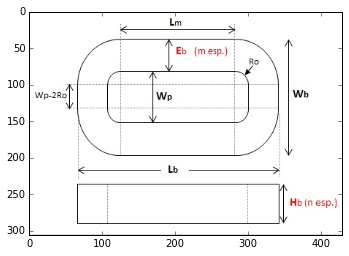

In [21]:
img=mpimg.imread('R:/Grupos/IMA/Lucas/IMAs/Bobina_IMAs.png')
imgplot = plt.imshow(img)

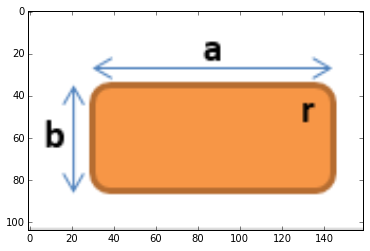

In [22]:
imge=mpimg.imread('R:/Grupos/IMA/Lucas/IMAs/fio solido.png')
imgplot = plt.imshow(imge)

---
# Coil Output<a id='Coil Output'> </a>
---

## Equation $L_{fio}$

In [23]:
Lfio = Eq(L_fio,2*n*m*(Lm +Wp -2*R0 + p_i*(R0+a_lin*m/2)))
Lfio

###Produto das camadas por espiras

In [24]:
Num = Eq(N,nn.value*mm.value)
Num

###Diâmetro equivalente (mm)

In [27]:
Dia = Eq(D,2*0/(np.pi)**(1/2))
Dia

###a'(com isolamento) (mm)

In [28]:
alinha = Eq(a_lin,aa.value+Isol_fio.value*2)
alinha

###b'(com isolamento) (mm)

In [29]:
blinha = Eq(b_lin,bb.value+Isol_fio.value*2)
blinha

###Volume do núcleo (m³)

In [30]:
Volnucleo = Eq(Volume_nuc, (Lmm.value/1000)*Seccao_de_aco.value)
Volnucleo

In [31]:
#Dimensões físicas da bobina
alt = nn.value*(bb.value+2*Isol_fio.value)+2   #altura do fio
larg = mm.value*(aa.value+2*Isol_fio.value)+2   #largura do fio

### Comprimento de fio por bobina (mm) <a id='Comprimento de fio por bobina (mm)'> </a>

In [32]:
Len = Lfio.rhs.subs({m:mm.value, n:nn.value, Lm:Lmm.value, Wp:Wpp.value,
                     R0:R00.value, p_i:np.pi, a_lin:alinha.rhs})
Len

### Secção de cobre do fio (mm²)

In [33]:
SecCobre = Eq(Sc,b*a-(p_i*(D)**2/4)-(4-p_i)*R**2)
SecC = SecCobre.simplify()
SecC

In [34]:
SecCu = SecC.rhs.subs({D:Dia.rhs, p_i:np.pi, R:rr.value, a:aa.value, b:bb.value})
SecCu

### Secção de Cobre/Área total do fio (%)

In [35]:
Porcent = SecCu/(aa.value*bb.value)*100
Porcent

### Seção útil bobina/isolamento (%)

In [36]:
SecUtil = Eq(Sec_util,(b*a-(4-p_i)*R**2)*N/(Ro*Ri))
SecUtil

In [37]:
SecUtl = SecUtil.rhs.subs({N:Num.rhs, R:rr.value, p_i:np.pi, a:aa.value,
                           b:bb.value, Ro:alt, Ri:larg})*100
SecUtl

### Resistência por bobina ($\Omega$)

In [38]:
Res = Eq(Rb,rho*Lfio.lhs/Sc).simplify() #segunda Lei de Ohm
Res

In [39]:
Resistencia = Res.rhs.subs({rho:Cobre[2], Lfio.lhs:Len*10**3, Sc:SecCu})
Resistencia


### Resistência/Ímã ($\Omega$)

In [40]:
R_i = Eq(R_ima,Nb*Rb)
R_i

In [41]:
Rima = R_i.rhs.subs({Nb:Nbb.value, Rb:Resistencia}) 
Rima

### Corrente @ 3GeV (A) <a id='Corrente @ 3GeV'> </a>

In [42]:
Corrente = Eq(I,NI_maximo.value/Num.rhs)
Corrente

### Densidade de corrente (A/mm²) <a id='Densidade de corrente (A/mm²)'> </a>

In [43]:
densidade = Eq(J,Corrente.rhs/SecCu)
densidade

### Tensão máxima por ímã (V) <a id='Tensão máxima por ímã (V)'> </a>

In [44]:
Tensao_ima = Eq(Vi_max,Corrente.rhs*Rima)
Tensao_ima

### Tensão máxima por bobina (V) <a id='Tensão máxima por bobina (V)'> </a>

In [45]:
Tensao_bobina = Eq(Vb_max,Tensao_ima.rhs/Nbb.value) 
Tensao_bobina

### Indutância por ímã (H)

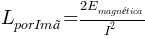

In [46]:
Indut = Eq(L, 2*E_mag/I**2)
Indut

In [48]:
Indutancia=Indut.rhs.subs({E_mag:0, I:Corrente.rhs}).doit()
Indutancia


### Indutância por bobina (H)

In [49]:
Indut_bobina = Eq(L_coil, L/Nb)
Indut_bobina

In [51]:
IndCoil = Indut_bobina.rhs.subs({L:Indutancia, Nb:Nbb.value})
IndCoil

### Potência Máxima (W)

In [52]:
Potencia = Eq(Power, Corrente.rhs*Tensao_ima.rhs)
Potencia

### Massa de cobre por ímã (kg)

In [53]:
Mass = Eq(MassaC, Nbb.value*Cobre[0]*(Len/1000)*SecCu*10**-6)
Mass

### Massa de aço por ímã (kg)

In [54]:
Massa = Eq(MassaA, Nbb.value*Aco[0]*Volnucleo.rhs)
Massa

### Massa total do ímã (kg)

In [55]:
Massa_total = Eq(MassaT, Mass.rhs+Massa.rhs)
Massa_total

### Comprimento de fio/ímã (m)

In [56]:
Total_Length = Nbb.value*Len/1000
Total_Length

### Tensão max. para 1 ímã (V)

In [57]:
V_max = Numero_de_imas.value*Tensao_ima.rhs
V_max

### Número de cabos em paralelo

In [58]:
Parallel_Cables = 1
Parallel_Cables

### Seção do cabo (mm²)

In [59]:
SeCable = 0
SeCable

### Resistência do cabo(520m; 1x95)($\Omega$)

In [60]:
cable_resistense = Eq(Ohm, Cobre[2]*520/(Parallel_Cables*SeCable*10**-6))
cable_resistense

### Tensão máx. no cabo (V)

In [61]:
Voltsmax = cable_resistense.rhs*Corrente.rhs
Voltsmax

### Max. da fonte 20 ímas @0.0 Hz + cabos

In [62]:
Max = Voltsmax+V_max
Max

#Hydraulic Parameters 
---

In [63]:
Vz, Vb, Ti, To, epsilon, Pot, V, f = symbols('\phi_total \phi_bobina T_in T_out \epsilon P V f_Haaland')
gam =symbols('\gamma')
D_cond = symbols('D_condutor')
area = symbols('Area_cond.')
D_in = symbols('D_interno')
MassaEsp = symbols('M_{H_2O}')
CalorEsp = symbols('c_{H_2O}')
Re, Visco = symbols('Re \mu')
D_hidra = symbols('D_hidráulico')
Pd, Ncurv = symbols('Perda_carga N_curvas')

## Hydraulic Input <a id='Parâmetros hidráulicos para um ímã'>  </a>

In [64]:
from IPython.html import widgets # Widget definitions
from IPython.display import display # Used to display widgets in the notebook
import re

alert_code = """
<div class="alert alert-{type} alert-dismissible" role="alert">
  <button type="button" class="close" data-dismiss="alert">
    <span aria-hidden="true">&times;</span>
  </button>
  <strong>{title}: </strong>{message}
</div>
"""
widget_1 = widgets.HTML()
tii = widgets.FloatText(description="Temp.Ini.(ºC):") #20 ºC
too = widgets.FloatText(description="Temp.Final(ºC):") #28 ºC
Rug = widgets.FloatText(description="Rugosid.(m):") # 2.5E-06 m
calor= widgets.FloatText(description="Calor espc.J/(kg.ºC):") #4190 J/(kg.ºC) 
massaEspec = widgets.FloatText(description="Massa espc.(kg/m³):") #1000 kg/m³
visco = widgets.FloatText(description="Visco.(m²/s):") # 9.13E-07 m²/s
minor = widgets.FloatText(description="Minor loss c.:") # 0.15
Inmax = widgets.FloatText(description="Entrada máx(bar):") # 8 bar
Retmin = widgets.FloatText(description="Retorno mín(bar):") # 0.5 bar
condut = widgets.FloatText(description="Condutivid. W/(m.K):") #0.564 W/(m.K)
Botao = widgets.Button(description="Ok")

def save_form(widget):
    if (tii.value != 0) & (too.value != 0) & (Rug.value != 0) & (calor.value != 0) & (massaEspec.value != 0) & (visco.value != 0) & (minor.value != 0) & (Inmax.value != 0) & (Retmin.value != 0) & (condut.value != 0):
        widget_1.value = alert_code.format(type="success",
                                            title="Salvo",
                                            message="Dados inseridos corretamente.",
                                             )
    else:
        widget_1.value = alert_code.format(type="danger",
                                            title="Alerta",
                                            message="Dados de entrada incorretos. Verifique se há valores inválidos.",
                                              )

Botao.on_click(save_form)

Conta1 = widgets.HBox(children=[tii, too, Rug, calor, massaEspec])
Conta1.align='center'
Conta2 = widgets.HBox(children=[visco, minor, Inmax, Retmin, condut])
Conta2.align='center'
Conta3 = widgets.Box(children=[widget_1, Conta1, Conta2, Botao])

tii.margin=15
too.margin=15
Rug.margin=15
calor.margin=15
massaEspec.margin=15
visco.magin=15
minor.margin=15
Inmax.margin=15
Retmin.margin=15
condut.margin=15

tabe = widgets.Tab()
tabe.children = [Conta3]
tabe.set_title(0, "Informações Hidráulicas")
tabe

##Overview of the input data

In [65]:
#Initialyzing Pandas to create table
Hydr = {'Unidade':['ºC','ºC','m','J/(kg.ºC)','kg/m³','m²/s','N/A','bar','bar','W/(m.K)'],
           'Valores': [tii.value, too.value, Rug.value, calor.value, massaEspec.value,
                       visco.value, minor.value, Inmax.value, Retmin.value, condut.value],
           'Informações Gerais':['Temperatura Inicial','Temperatura Final','Rugosidade','Calor específico','Massa específica',
                                 'Viscosidade', 'Minor loss coefficient','Entrada máxima','Retorno mínimo','Condutividade']}
DataFrame(Hydr)

,Informações Gerais,Unidade,Valores
0,Temperatura Inicial,ºC,0
1,Temperatura Final,ºC,0
2,Rugosidade,m,0
3,Calor específico,J/(kg.ºC),0
4,Massa específica,kg/m³,0
5,Viscosidade,m²/s,0
6,Minor loss coefficient,N/A,0
7,Entrada máxima,bar,0
8,Retorno mínimo,bar,0
9,Condutividade,W/(m.K),0


---
##<span style="color:blue">Hydraulic Output</span><a id='Hydraulic Output'> </a>

### Potência dissipada/bobina (W)<a id='Potência dissipada/bobina (W)'> </a>

In [66]:
Poten = Eq(Pot,Power/Nb)
Poten

In [67]:
potenn = Poten.rhs.subs({Power:Potencia.rhs, Nb:Nbb.value})
potenn

### Diâmetro interno do condutor (m)

In [68]:
diametro = Eq(D_in,Dia.rhs/1000)
diametro

### Área molhada do condutor (m²)

In [69]:
A = Eq(area,p_i*(D_in)**2/4)
A

In [70]:
Area = A.rhs.subs({p_i:np.pi, D_in:diametro.rhs})
Area

### <span style="color:red">Vazão/Bobina (l/min)</span><a id='Vazão/Bobina (l/min)'> </a>

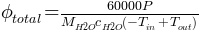

In [71]:
vazao = Eq(Vz,Pot/(MassaEsp*CalorEsp*(To-Ti))*1000*60)
vazao

In [72]:
Vazao = vazao.rhs.subs({Pot:potenn, MassaEsp:massaEspec.value,
                         CalorEsp:calor.value, To:too.value, Ti:tii.value})
Vazao

### Velocidade média da água (m/s)

In [73]:
Velocidade = (Vazao/1000/60)/Area
Velocidade

### Coeficiente de Reynolds

In [74]:
Coef_Rey = Eq(Re,D_in*V/Visco)
Coef_Rey

In [75]:
Coef_Reynolds = Coef_Rey.rhs.subs({D_in:diametro.rhs, V:Velocidade, Visco:visco.value})
Coef_Reynolds

### Diâmetro hidráulico

In [76]:
Diameter = Eq(D_hidra,4*area/(p_i*D_in))
Diameter

In [77]:
Dia_meter = Diameter.rhs.subs({area:Area, p_i:np.pi, D_in:diametro.rhs})
Dia_meter

### $\epsilon$ /D

In [78]:
razao = Rug.value/diametro.rhs
razao

### Friction factor - f (eq. de Swamee–Jain)

In [79]:
from IPython.display import display, Math, Latex
display(Math(r'f(V, D, \nu, \epsilon) = \frac{0.25}{\log(\frac{\epsilon}{3.7 \cdot D}+\frac{5.74}{RE(V, D, \nu)^{0.9}})^2}'))

<IPython.core.display.Math object>

In [80]:
#$$f(V, D, \nu, \epsilon) = \frac{0.25}{\log(\frac{\epsilon}{3.7 \cdot D}+\frac{5.74}{RE(V, D, \nu)^{0.9}})^2}$$

In [81]:
0.25/(math.log((razao/3.7+5.74/(Coef_Reynolds**0.9)),10)**2)

### Friction factor - f (eq. de Haaland)

In [82]:
from IPython.display import display, Math, Latex
display(Math(r'\frac{1}{\sqrt{f}} = -1.8 \log((\frac{e/D}{3.7})^{1.11}+\frac{6.9}{Re}))'))

<IPython.core.display.Math object>

In [83]:
Haaland =Eq(f,1/(-1.8*math.log((razao/3.7)**1.11+6.9/Coef_Reynolds,10))**2)
Haaland

### R/D

In [84]:
R00.value/Dia.rhs

### Número de curvas (90°) por circuito hidr.

In [85]:
Nc=Eq(Ncurv, n*m*4)
Nc

In [86]:
Num_curva = Nc.rhs.subs({n:nn.value, m:mm.value})
Num_curva

### <span style="color:red">Perda de carga total (com 72 curvas)- hf (bar)</span><a id='Perda de carga total (com 72 curvas)- hf (bar)'> </a>

In [87]:
Equacao = Eq(Pd,f*(L_fio/D_in*(V**2/(2*9.8)))/10+Ncurv*(gam*V**2/(2*9.8))/10)
Equa=Equacao.simplify()
Equa

In [88]:
Solution = Equacao.rhs.subs({f:Haaland.rhs, L_fio:Len/1000, D_in:diametro.rhs,
                          V:Velocidade, Ncurv:Num_curva, gam:minor.value})
Solution

### <span style="color:red">Vazão total em um ímã (l/min)</span> <a id='Vazão total em um ímã (l/min)'> </a>

In [89]:
vaza =Eq(Vz, Nb*Vb )
vaza

In [90]:
Vazao*Nbb.value

<a href='#Inicio'>Back to the Table of Contents</a>